In [ ]:
# auto correct 

In [ ]:
from datasets import load_dataset

dataset = load_dataset("tweet_eval", "emoji")

In [39]:
dataset

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 45000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 50000
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 5000
    })
})

In [40]:
import pandas as pd 
from sklearn.model_selection import train_test_split

# Convert each dataset to pandas DataFrame and combine all splits
combined = pd.concat([dataset['train'].to_pandas(), dataset['test'].to_pandas(), dataset['validation'].to_pandas()])

# Reset the index of the combined DataFrame
combined.reset_index(drop=True, inplace=True)

# train, validation = train_test_split(combined, train_size=0.8, random_state=42)

print(f'Train size: {len(train)}')
print(f'Validation size: {len(validation)}')


NameError: name 'train' is not defined

In [41]:
# ds=train['text']
ds=combined['text']

In [42]:
print(ds)
print(type(ds))

0        Sunday afternoon walking through Venice in the...
1        Time for some BBQ and whiskey libations. Chomp...
2        Love love love all these people ️ ️ ️ #friends...
3                                      ️ ️ ️ ️ @ Toys"R"Us
4        Man these are the funniest kids ever!! That fa...
                               ...                        
99995    don't know what I'd do without you @ Keene Sta...
99996    Senior night with my little Bailey !! So proud...
99997    Real friends or labeled as family! #BrotherMan...
99998    It makes me so happy meet people wearing hats ...
99999    It's been 48 hours with her and she still hasn...
Name: text, Length: 100000, dtype: object
<class 'pandas.core.series.Series'>


In [45]:
import nltk   
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt      
import random

In [27]:
# download the stopwords from NLTK
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [28]:
#Import the english stop words list from NLTK
stopwords= stopwords.words('english')

In [46]:
# def text_processing(example):
    
#     # convert all letters to lower case
#     example=example.lower()

#     # Remove links
#     example = re.sub(r'http\S+|www.\S+', '', example)


#     # Replace periods at the end of a sentence or text with '<EOS>' token
#     example = re.sub(r'\.( |$)', ' <EOS> ', example)

#     # Remove other non-alphanumeric characters (excluding '<EOS>' and '.')
#     example = re.sub(r'[^a-zA-Z0-9 <EOS>.]', ' ', example)
    
#     # Tokenize the sentence
#     example_tokens = example.split()
# #     example_tokens = nltk.word_tokenize(example)
    
#     return example_tokens


def text_processing(example, n=3):
    
    # convert all letters to lower case
    example = example.lower()

    # Remove links
    example = re.sub(r'http\S+|www.\S+|@|️', '', example)

    # Split the text into sentences
    sentences = sent_tokenize(example)
    
#     print(sentences)
    processed_text = []
    for sentence in sentences:
        
# #         Remove other non-alphanumeric characters (excluding '<EOS>' and '.')
#         sentence = re.sub(r'[^a-zA-Z0-9]', ' ', example)
    
        # Tokenize the sentence
        sentence_tokens = nltk.word_tokenize(sentence)
    
        
#         # Replace periods with '<EOS>' token only if they are at the end of a sentence
#         sentence_tokens = ['EOS' if token == '.' else token for token in sentence_tokens]

#         # Add '<s>' token at the start of the text n-1 times
#         sentence_tokens = ['<s>'] * (n-1) + sentence_tokens +['</s>']
        
        # Filter out empty strings
        sentence_tokens = [token for token in sentence_tokens if token.strip()]

        processed_text.extend(sentence_tokens)
    
    return processed_text

print('original text: ',ds[0])
print('processing text : ',text_processing(ds[0]))
    

original text:  Sunday afternoon walking through Venice in the sun with @user ️ ️ ️ @ Abbot Kinney, Venice
processing text :  ['sunday', 'afternoon', 'walking', 'through', 'venice', 'in', 'the', 'sun', 'with', 'user', 'abbot', 'kinney', ',', 'venice']


In [47]:
ds=ds.apply(text_processing)

In [47]:
words=[word for text in ds for word in text]

In [48]:
print(words[:10])

['<s>', '<s>', 'we', 'got', 'it', 'done', 'today', 'christmastree', 'iheartchristmas', 'greatweekend']


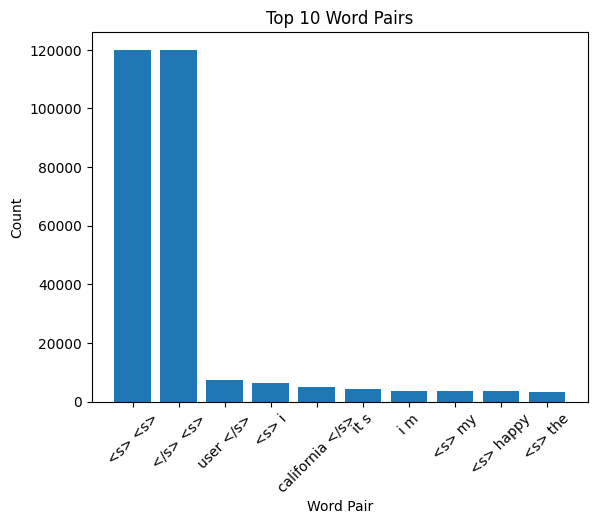

In [196]:
from collections import Counter
import matplotlib.pyplot as plt


# Create a list of word pairs
word_pairs = [(words[i], words[i + 1]) for i in range(len(words) - 1)]

# Count the occurrences of each word pair
counter2 = Counter(word_pairs)

# Convert the counter to a list of (word_pair, count) tuples
word_pair_counts = list(counter2.items())

# Sort the list by count in descending order
word_pair_counts.sort(key=lambda x: x[1], reverse=True)

# Get the top 10 word pairs
top_10_word_pairs = word_pair_counts[:10]

# Unzip the word pairs and counts into separate lists
word_pairs, counts = zip(*top_10_word_pairs)

# Convert the word pairs to strings
word_pairs = [' '.join(pair) for pair in word_pairs]

# Create a bar chart
plt.bar(word_pairs, counts)
plt.xlabel('Word Pair')
plt.ylabel('Count')
plt.title('Top 10 Word Pairs')
plt.xticks(rotation=45)
plt.show()


In [197]:
vocab=set(words)

In [198]:
print(len(vocab))
print(list(vocab)[:10])

84916
['gilroygarlicfestival', 'alvernia', 'mazzotta', 'buried', 'bringemback', 'iraglass', 'straps', 'edina', 'tho', 'pretties']


In [199]:
from collections import Counter
freq_dict=Counter(words)

In [200]:
print(len(freq_dict))
for w,freq in list(freq_dict.items())[:10]:
    print(w,freq)

84916
<s> 240060
we 7280
got 2947
it 11445
done 495
today 4431
christmastree 132
iheartchristmas 2
greatweekend 2
vintagebulbs 2


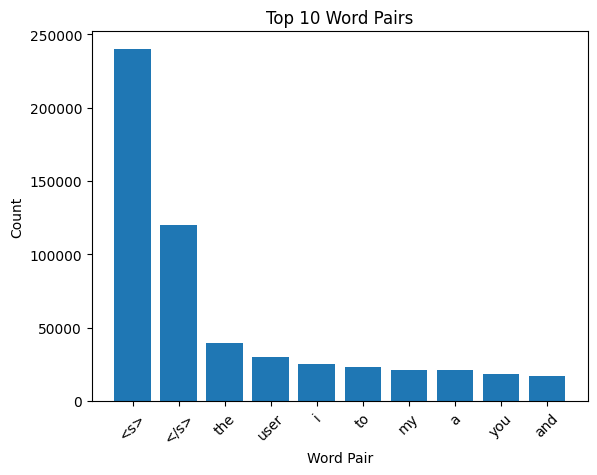

In [201]:
freq_words=list(freq_dict.items())

# Sort the list by count in descending order
freq_words.sort(key=lambda x: x[1], reverse=True)

# Get the top 10 frequent word
top_10_word_freqs=freq_words[:10]

# Unzip the words and counts into separate lists
top_10_word, freqs= zip(*top_10_word_freqs)


# Create a bar chart
plt.bar(top_10_word, freqs)
plt.xlabel('Word Pair')
plt.ylabel('Count')
plt.title('Top 10 Word Pairs')
plt.xticks(rotation=45)
plt.show()

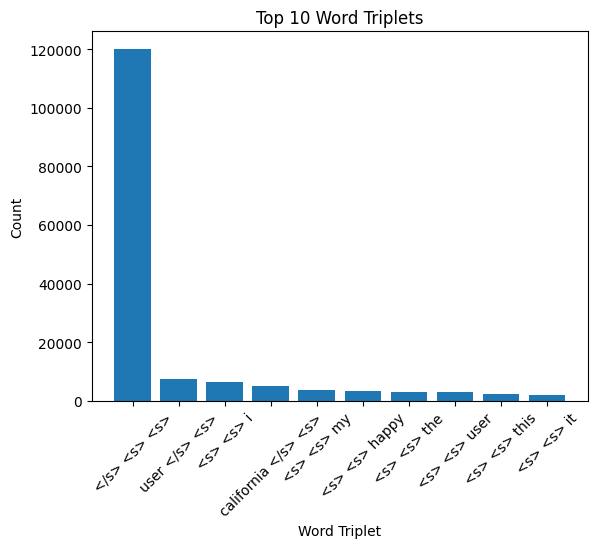

In [202]:


# Create a list of word triplets
word_triplets = [(words[i], words[i + 1], words[i + 2]) for i in range(len(words) - 2)]

# Count the occurrences of each word triplet
counter = Counter(word_triplets)

# Convert the counter to a list of (word_triplet, count) tuples
word_triplet_counts = list(counter.items())

# Sort the list by count in descending order
word_triplet_counts.sort(key=lambda x: x[1], reverse=True)

# Get the top 10 word triplets
top_10_word_triplets = word_triplet_counts[:10]

# Unzip the word triplets and counts into separate lists
word_triplets, counts = zip(*top_10_word_triplets)

# Convert the word triplets to strings
word_triplets = [' '.join(triplet) for triplet in word_triplets]

# Create a bar chart
plt.bar(word_triplets, counts)
plt.xlabel('Word Triplet')
plt.ylabel('Count')
plt.title('Top 10 Word Triplets')
plt.xticks(rotation=45)
plt.show()

In [203]:
def edits1(word):
    letters = 'abcdefghijklmnopqrstuvwxyz'
    splits = [(word[:i], word[i:]) for i in range(len(word) + 1)]
    deletes = [L + R[1:] for L, R in splits if R]
    transposes = [L + R[1] + R[0] + R[2:] for L, R in splits if len(R)>1] #  the same as switchs
    replaces = [L + c + R[1:] for L, R in splits if R for c in letters]
    inserts = [L + c + R for L, R in splits for c in letters]
    return set(deletes + transposes + replaces + inserts)

def edits2(word):
    return set(e2 for e1 in edits1(word) for e2 in edits1(e1))

def edits3(word):
    return set(e3 for e1 in edits1(word) for e2 in edits1(e1) for e3 in edits1(e2))


In [204]:
# Test the function with the word 'apple'
word = 'apple'

# Generate words at an edit distance of 1
edits1_word = edits1(word)
print(f"Words at an edit distance of 1 from '{word}': {list(edits1_word)[:5]}...")

# Generate words at an edit distance of 2
edits2_word = edits2(word)
print(f"Words at an edit distance of 2 from '{word}': {list(edits2_word)[:5]}...")

# # Generate words at an edit distance of 3
# edits3_word = edits3(word)
# print(f"Words at an edit distance of 3 from '{word}': {list(edits3_word)[:5]}...")


Words at an edit distance of 1 from 'apple': ['aepple', 'awpple', 'appleo', 'appele', 'apyle']...
Words at an edit distance of 2 from 'apple': ['xapplte', 'wnpple', 'apilef', 'papple', 'ajpplet']...


In [205]:
def calculate_probability(word, unigram_counts, prev_word=None, next_word=None, bigram_counts=None, trigram_counts=None):
    # Calculate the individual word probability with smoothing
    word_prob = np.log((unigram_counts.get(word, 0) + 1) / (sum(unigram_counts.values()) + len(unigram_counts)))

    combined_prob = word_prob

    if prev_word and bigram_counts:
        # Calculate the conditional probability of the word given the previous word with smoothing
        bigram = (prev_word, word)
        bigram_prob = np.log((bigram_counts.get(bigram, 0) + 1) / (unigram_counts.get(prev_word, 0) + len(unigram_counts)))
        combined_prob = bigram_prob

    if next_word and bigram_counts:
        # Calculate the conditional probability of the word given the next word with smoothing
        bigram = (word, next_word)
        bigram_prob = np.log((bigram_counts.get(bigram, 0) + 1) / (unigram_counts.get(next_word, 0) + len(unigram_counts)))
        combined_prob = bigram_prob

    if prev_word and next_word and trigram_counts:
        # Calculate the conditional probability of the word given the previous and next words with smoothing
        trigram = (prev_word, word, next_word)
        trigram_prob = np.log((trigram_counts.get(trigram, 0) + 1) / (bigram_counts.get((prev_word, next_word), 0) + len(bigram_counts)))
        combined_prob = trigram_prob

    return combined_prob


In [206]:
def filter_known_words(words, vocab):
    "The subset of `words` that appear in the `vocab`."
    return set(words).intersection(vocab)

def correct(word, prev_word, next_word, vocab, edit1, edit2, unigram_counts, bigram_counts, trigram_counts):
    "Find the best correct spelling for `word`."

    # Generate candidate words
    
    candidates = (filter_known_words([word], vocab) | 
                  filter_known_words(edit1(word), vocab) | 
                  filter_known_words(edit2(word), vocab))
   
    

    # Calculate the probability for each candidate word
    probs = {candidate: calculate_probability(candidate, unigram_counts, prev_word, next_word, bigram_counts, trigram_counts) for candidate in candidates}
 
    # Return the candidate word with the highest probability
    return max(probs, key=probs.get),max(probs.values())


In [214]:
prev_word = 'there'  # Previous word
word = 'aer'  # Word to correct
next_word = 'four'  # Next word
print(correct(word, prev_word, next_word, vocab, edits1, edits2, freq_dict, counter2, counter))

('kev', -12.955675771034334)


In [208]:
def correct_text(text, vocab, edit1, edit2, unigram_counts, bigram_counts, trigram_counts):
    # Tokenize and process the text
    words=text_processing(text)
    
    # Initialize an empty list to hold the corrected words
    corrected_words = []
    
    # Iterate over each word in the text
    for i, word in enumerate(words):
        # If the word is not in the vocabulary, it's considered a misspelled word
        if word not in vocab:
            # Get the previous and next words
            prev_word = words[i-1] if i > 0 else ''
            next_word = words[i+1] if i < len(words) - 1 else ''
            
            # Correct the misspelled word
            corrected_word,_= correct(word, prev_word, next_word, vocab, edit1, edit2, unigram_counts, bigram_counts, trigram_counts)
            
            # Add the corrected word to the list
            corrected_words.append(corrected_word)
        else:
            # If the word is in the vocabulary, it's considered a correctly spelled word
            # Add the correctly spelled word to the list
            corrected_words.append(word)
    print(corrected_words)
    
    # Join the corrected words back into a string
    corrected_text = ' '.join(corrected_words)
    
    return corrected_text


In [209]:
# Sample text with misspelled words
text = "This is a tst of the corret funtion."

print(correct_text(text, vocab, edits1, edits2, freq_dict, counter2, counter))

['<s>', '<s>', 'this', 'is', 'a', 'lot', 'of', 'the', 'corrupt', 'auction', 'rh', '</s>']
<s> <s> this is a lot of the corrupt auction rh </s>


In [ ]:
# autocomplete


In [49]:
from collections import Counter

def build_freq_vocab(tokenized_text, min_freq):
    # Flatten the corpus and count the frequency of each word
    word_counts = Counter(word for sentence in tokenized_text for word in sentence)
    
    # Create the vocabulary by replacing rare words with '<unk>'
    vocab = {word if count >= min_freq else '<unk>': count for word, count in word_counts.items()}
    
    return vocab,list(vocab.keys())


# corpus = [["this", "is", "a", "sentence"], ["this", "is", "another", "sentence"], ["this", "is", "yet", "another", "sentence"]]
# freq_vocab,vocab = build_freq_vocab(corpus, min_freq=2)
# print(vocab)
# vocab=vocab+['s','eos']
# print(vocab)

freq_vocab,vocab = build_freq_vocab(ds, min_freq=3)
vocab=vocab+['s','eos']



In [50]:
from collections import Counter

def replace_rare_words(tokenized_text, min_freq):
    # Flatten the corpus and count the frequency of each word
    word_counts = Counter(word for sentence in tokenized_text for word in sentence)
    
    # Replace words in tokenized_text that appear less than min_freq times with '<unk>'
    new_tokenized_text = [[word if word_counts[word] >= min_freq else '<unk>' for word in sentence] for sentence in tokenized_text]
    
    return new_tokenized_text

# tokenized_text = [["this", "is", "a", "sentence"], ["this", "is", "another", "sentence"], ["this", "is", "yet", "another", "sentence"]]
# new_tokenized_text = replace_rare_words(tokenized_text, min_freq=2)
# print(new_tokenized_text)
ds=replace_rare_words(ds, min_freq=3)


In [51]:
from collections import Counter


def add_start_end_tokens(tokenized_text, n):
    # Add n start tokens and one end token to each sentence
    new_tokenized_text = [["<s>"] * n + sentence + ["<eos>"] for sentence in tokenized_text]
    
    return new_tokenized_text
def generate_ngrams(sentence, n):
    return [tuple(sentence[i:i+n]) for i in range(len(sentence)-n+1)]

def count_ngrams(tokenized_text, n):
    
    tokenized_text=add_start_end_tokens(tokenized_text, n)
    # Generate all n-grams from the tokenized text
    all_ngrams = [ngram for sentence in tokenized_text for ngram in generate_ngrams(sentence, n)]
    
    # Count the frequency of each n-gram
    ngram_counts = Counter(all_ngrams)
    
    return ngram_counts

tokenized_text = [["this", "is", "a", "sentence"], ["this", "is", "another", "sentence"], ["this", "is", "yet", "another", "sentence"]]
ngram_counts = count_ngrams(tokenized_text, n=1)
ngram_counts1 = count_ngrams(tokenized_text, n=2)
print(ngram_counts)


Counter({('<s>',): 3, ('this',): 3, ('is',): 3, ('sentence',): 3, ('<eos>',): 3, ('another',): 2, ('a',): 1, ('yet',): 1})


In [234]:

def sentence_probability(sentence, ngram_counts, nplus1gram_counts, n,vocab_size):
    # Add start and end tokens to the sentence
    sentence = ["<s>"] * n + sentence + ["<eos>"]
    
    # Generate n-grams and (n+1)-grams from the sentence
    sentence_ngrams = list(generate_ngrams(sentence, n))
    sentence_nplus1grams = list(generate_ngrams(sentence, n+1))
    
    # Calculate the log probability of the sentence
    probability = 0.0
    for ngram, nplus1gram in zip(sentence_ngrams, sentence_nplus1grams):
        # Use smoothing for unseen n-grams
        ngram_count = ngram_counts[ngram] if ngram in ngram_counts else 0
        nplus1gram_count = nplus1gram_counts[nplus1gram] if nplus1gram in nplus1gram_counts else 0
        
        # Use log probabilities to avoid underflow
        probability += np.log((nplus1gram_count + 1) / (ngram_count + vocab_size))
    
    return probability


sentence = ["this", "is", "a", "sentence"]
log_probability = sentence_probability(sentence, ngram_counts,ngram_counts1, n=2,len(vocab))
print(log_probability)


-10.39720770839918


In [25]:
import numpy as np
def calculate_probability(word, last_ngram, ngram_counts, nplus1gram_counts, vocab_size):
    # Calculate the probability of the word given the last n-gram
    ngram_count = ngram_counts.get(last_ngram, 0)
    nplus1gram_count = nplus1gram_counts.get(last_ngram + (word,), 0)
    probability = np.log((nplus1gram_count + 1) / (ngram_count + vocab_size))
    
    return probability

def predict_next_word(previous_tokens, ngram_counts, nplus1gram_counts, vocab):
    
    n=len(list(ngram_counts.keys())[0])
    
    # Get the last n tokens
    last_ngram = tuple(previous_tokens[-n:])
    
    # Calculate the probabilities for each word in the vocabulary
    probabilities = {word: calculate_probability(word, last_ngram, ngram_counts, nplus1gram_counts, len(vocab)) for word in vocab}
    
    # Find the word with the highest probability
    next_word = max(probabilities, key=probabilities.get)
    max_probability = probabilities[next_word]
    
    return next_word, max_probability,probabilities


In [64]:

def calculate_probability(word, last_ngram, ngram_counts, nplus1gram_counts, vocab_size):
    # Calculate the probability of the word given the last n-gram
    ngram_count = ngram_counts.get(last_ngram, 0)
    nplus1gram_count = nplus1gram_counts.get(last_ngram + (word,), 0)
    probability = np.log((nplus1gram_count + 1) / (ngram_count + vocab_size))
    
    return probability

def predict_next_word(previous_tokens, ngram_counts, nplus1gram_counts, vocab, start_of_word=None):
    
    n=len(list(ngram_counts.keys())[0])

    # Get the last n tokens
    last_ngram = tuple(previous_tokens[-n:])
    print(last_ngram)

    # Filter the vocabulary to only include words that start with the given characters
    if start_of_word is not None:
        vocab = [word for word in vocab if word.startswith(start_of_word)]
    
    # Calculate the probabilities for each word in the vocabulary
    probabilities = {word: calculate_probability(word, last_ngram, ngram_counts, nplus1gram_counts, len(vocab)) for word in vocab}
    
    # Find the word with the highest probability
    next_word = max(probabilities, key=probabilities.get)
    max_probability = probabilities[next_word]
    
    return next_word,max_probability,probabilities


In [65]:
prev_tokens=['i','like']
n=2
ngram_counts=count_ngrams(ds,n)
# print(ngram_counts)
nplus1gram_counts=count_ngrams(ds,n+1)
next_word,prob,_=predict_next_word(prev_tokens, ngram_counts, nplus1gram_counts, vocab)
print(next_word,prob)

('i', 'like')
to -6.854642147877601
